In [1]:
import pandas as pd
import numpy as np
import time
import mglearn

import warnings
warnings.filterwarnings('ignore')
# Found Data Set
# Generally This dataset is about Econmic Freedoms in the world
df = pd.read_csv('efw_cc.csv')
dataframe_copy = df.copy()

In [2]:
dataframe_copy.head(5)

,year,ISO_code,countries,ECONOMIC FREEDOM,rank,quartile,1a_government_consumption,1b_transfers,1c_gov_enterprises,1d_top_marg_tax_rate,...,3_sound_money,4a_tariffs,4b_regulatory_trade_barriers,4c_black_market,4d_control_movement_capital_ppl,4_trade,5a_credit_market_reg,5b_labor_market_reg,5c_business_reg,5_regulation
0,2016,ALB,Albania,7.54,34.0,1.0,8.232353,7.509902,8.0,8.0,...,9.553657,8.963556,7.489905,10.00000,6.406138,8.214900,7.098562,6.916278,6.705863,6.906901
1,2016,DZA,Algeria,4.99,159.0,4.0,2.150000,7.817129,0.0,4.5,...,7.253894,6.872533,2.481294,5.56391,1.590362,4.127025,5.100509,5.029513,5.676956,5.268992
2,2016,AGO,Angola,5.17,155.0,4.0,7.600000,8.886739,0.0,9.5,...,5.606605,6.989244,2.024949,10.00000,2.044823,5.264754,7.064905,4.560325,4.930271,5.518500
3,2016,ARG,Argentina,4.84,160.0,4.0,5.335294,6.048930,6.0,4.0,...,5.614336,6.421600,4.811105,0.00000,4.697482,3.982547,5.419820,5.151405,5.535831,5.369019
4,2016,ARM,Armenia,7.57,29.0,1.0,7.264706,7.748532,8.0,5.0,...,9.521940,8.547556,7.194410,10.00000,6.830998,8.143241,9.102046,6.234630,6.797530,7.378069


In [3]:
dataframe_copy2 = dataframe_copy.dropna(subset = ["ECONOMIC FREEDOM"], inplace=False)

#### Creating and converting values into int. and then will use label encoding to turn into Categories

###### looking at the difference between rounding the Economic Freedom value either up or down.

In [4]:
rounded_down = dataframe_copy2['ECONOMIC FREEDOM'].apply(np.floor)
rounded_down = rounded_down.rename('Label_down')  

In [5]:
rounded_up = dataframe_copy2['ECONOMIC FREEDOM'].apply(np.ceil)
rounded_up = rounded_up.rename('Label_up')

In [6]:
dataframe_copy3 = pd.concat([dataframe_copy2, rounded_down, rounded_up], axis = 1) # Did this to look at which produced the better output latter on either rounding up or down.

In [8]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
type_le = LabelEncoder()
type_labels_up = type_le.fit_transform(dataframe_copy3['Label_up'])
type_labels_down = type_le.fit_transform(dataframe_copy3['Label_down'])
dataframe_copy3['Labels_For_Down'] = type_labels_up
dataframe_copy3['Labels_For_Up'] = type_labels_down
dataframe_copy4 = dataframe_copy3

In [9]:
dataframe_copy4.isnull().sum()
dataframe_copy4 = dataframe_copy4[dataframe_copy4.Labels_For_Down != 0]
dataframe_copy4 = dataframe_copy4[dataframe_copy4.Labels_For_Up != 0] 
# I had to do this becasue if i didn't do this than there is an instance is that one of the labels only have 1 output.

In [ ]:
corr_matrix = dataframe_copy4.corr()
corr_matrix_specific = np.abs(corr_matrix['ECONOMIC FREEDOM'])
top_correlations = corr_matrix_specific.sort_values(ascending = False)
#print(top_correlations, top_correlations.shape)
#Use correlation matrix simlar to projects 1 and 2 to cut down my dataframe.

In [11]:
chosen_correlations = top_correlations[:'4c_black_market']
# Chose to use the cut off of 4c_blackmarket as the lowest correlation to use

In [12]:
correlation_index = chosen_correlations.index
final_dataframe = dataframe_copy4.loc[:,correlation_index]
final_dataframe # Reformated the dataset to match the number of columns that i chose above.

,ECONOMIC FREEDOM,Label_up,Labels_For_Down,Labels_For_Up,Label_down,4_trade,3_sound_money,quartile,5_regulation,4d_control_movement_capital_ppl,...,2_property_rights,4b_regulatory_trade_barriers,rank,2d_military_interference,3d_freedom_own_foreign_currency,2c_protection_property_rights,2h_reliability_police,2a_judicial_independence,4a_tariffs,4c_black_market
0,7.54,8.0,6,6,7.0,8.214900,9.553657,1.0,6.906901,6.406138,...,5.071814,7.489905,34.0,8.333333,10.0,4.512228,6.933500,2.668222,8.963556,10.00000
1,4.99,5.0,3,3,4.0,4.127025,7.253894,4.0,5.268992,1.590362,...,4.690743,2.481294,159.0,4.166667,5.0,4.689952,6.136845,4.186704,6.872533,5.56391
2,5.17,6.0,4,4,5.0,5.264754,5.606605,4.0,5.518500,2.044823,...,2.963635,2.024949,155.0,3.333333,5.0,2.512364,3.016104,1.843129,6.989244,10.00000
3,4.84,5.0,3,3,4.0,3.982547,5.614336,4.0,5.369019,4.697482,...,3.904030,4.811105,160.0,7.500000,10.0,4.255995,3.385786,3.689690,6.421600,0.00000
4,7.57,8.0,6,6,7.0,8.143241,9.521940,1.0,7.378069,6.830998,...,5.809215,7.194410,29.0,5.833333,10.0,5.664317,5.714028,3.867379,8.547556,10.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3713,4.44,5.0,3,3,4.0,2.511111,6.884312,4.0,4.804833,0.000000,...,3.129436,NaN,47.0,NaN,0.0,3.600000,NaN,NaN,3.533333,4.00000
3714,3.52,4.0,2,2,3.0,0.000000,4.109000,4.0,NaN,0.000000,...,3.894571,NaN,54.0,NaN,0.0,4.500000,NaN,NaN,0.000000,0.00000
3718,5.94,6.0,4,4,5.0,4.688889,5.985333,3.0,7.410406,2.000000,...,8.033465,NaN,29.0,NaN,0.0,9.600000,NaN,NaN,2.066667,10.00000
3719,7.77,8.0,6,6,7.0,8.800000,9.588777,1.0,6.841801,8.000000,...,8.346500,NaN,4.0,NaN,10.0,10.000000,NaN,NaN,8.400000,10.00000


In [13]:
X = final_dataframe.drop(['ECONOMIC FREEDOM', 'Label_up', 'Labels_For_Down', "Labels_For_Up", 'Label_down'], axis = 1)
y_round_down = final_dataframe.Labels_For_Down
y_round_up = final_dataframe.Labels_For_Up

# Split the dataframe into X and y

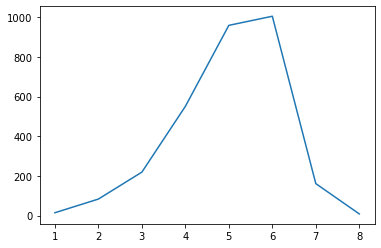

In [14]:
import matplotlib.pyplot as plt
(Unique, Counts) = np.unique(y_round_up, return_counts = True)
frequencies = np.asarray((Unique, Counts)).T
plt.plot(Unique, Counts)
# Looked at the type of labels are. So looking at the curve of them. it looks normal aka gaussian. 

### Now i Have the splits of everything that has been stratified correctly. 

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
# Creating the 
X_array = X.to_numpy()
y_down_array = y_round_down.to_numpy()
y_up_array = y_round_up.to_numpy()
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)


split.get_n_splits(X_array, y_down_array)
print(split)
for train_index , test_index in split.split(X_array, y_down_array):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train_down = X_array[train_index]
    X_test_down = X_array[test_index]
    y_train_down = y_down_array[train_index]
    y_test_down = y_down_array[test_index]
    
    
split.get_n_splits(X_array, y_up_array)
print(split)
for train_index , test_index in split.split(X_array, y_up_array):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train_up = X_array[train_index]
    X_test_up  = X_array[test_index]
    y_train_up  = y_up_array[train_index]
    y_test_up  = y_up_array[test_index]

    
    
#### One of the tests i wanted to run was see which (rounded up or down) produced the better results. In order to do this I had to make two different sets of split data

StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2,
            train_size=None)
StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2,
            train_size=None)


# For Getting rid of Missing Values

In [16]:
# Cleaning the Data Sets
X_train_down = pd.DataFrame(X_train_down, columns = X.columns)
X_test_down = pd.DataFrame(X_test_down, columns = X.columns)
X_train_down = X_train_down.fillna(X_train_down.mean())
X_test_down = X_test_down.fillna(X_train_down.mean())


In [17]:
# Cleaning the Data Sets
X_train_up = pd.DataFrame(X_train_up, columns = X.columns)
X_test_up = pd.DataFrame(X_test_up, columns = X.columns)
X_train_up = X_train_up.fillna(X_train_up.mean())
X_test_up = X_test_up.fillna(X_train_up.mean())

# Start of Project 3: 

## Step 1:

### Now i have to scale everything 

### Note I am scaling everything here

In [18]:
from sklearn.preprocessing import StandardScaler
#Scaling the dataset
scaler = StandardScaler() 
scaler.fit(X_train_down)
X_train_down = pd.DataFrame(scaler.transform(X_train_down),columns = X_train_down.columns)  
X_test_down = pd.DataFrame(scaler.transform(X_test_down),columns = X_test_down.columns)


scaler = StandardScaler()
scaler.fit(X_train_up)
X_train_up = pd.DataFrame(scaler.transform(X_train_up),columns = X_train_up.columns)  
X_test_up = pd.DataFrame(scaler.transform(X_test_up),columns = X_test_up.columns)

In [19]:
X_train_down.describe() #Double checking the Mean and STD are equal to close as possibel to 0.

,4_trade,3_sound_money,quartile,5_regulation,4d_control_movement_capital_ppl,5c_business_reg,5a_credit_market_reg,2_property_rights,4b_regulatory_trade_barriers,rank,2d_military_interference,3d_freedom_own_foreign_currency,2c_protection_property_rights,2h_reliability_police,2a_judicial_independence,4a_tariffs,4c_black_market
count,2.401000e+03,2.401000e+03,2.401000e+03,2.401000e+03,2.401000e+03,2.401000e+03,2.401000e+03,2.401000e+03,2.401000e+03,2.401000e+03,2.401000e+03,2.401000e+03,2.401000e+03,2.401000e+03,2.401000e+03,2.401000e+03,2.401000e+03
mean,-1.976068e-16,-7.809940e-17,2.111782e-16,-7.600704e-16,1.110223e-16,4.956931e-17,-1.611927e-16,1.149419e-16,-3.429623e-16,-8.614517e-17,-3.332056e-16,-1.553665e-17,-1.643371e-16,-2.222057e-16,1.192068e-16,4.892195e-16,-1.155538e-16
std,1.000208e+00,1.000208e+00,1.000208e+00,1.000208e+00,1.000208e+00,1.000208e+00,1.000208e+00,1.000208e+00,1.000208e+00,1.000208e+00,1.000208e+00,1.000208e+00,1.000208e+00,1.000208e+00,1.000208e+00,1.000208e+00,1.000208e+00
min,-4.037741e+00,-4.339892e+00,-1.335517e+00,-3.865700e+00,-1.727598e+00,-3.765823e+00,-4.124799e+00,-2.418950e+00,-4.159675e+00,-1.625177e+00,-2.587795e+00,-1.380319e+00,-2.939430e+00,-3.745684e+00,-2.617168e+00,-4.064423e+00,-4.214723e+00
25%,-4.487981e-01,-5.871867e-01,-1.335517e+00,-6.195675e-01,-8.466842e-01,-4.804651e-01,-4.755355e-01,-7.326701e-01,-3.651506e-01,-8.494218e-01,-6.070998e-01,-1.380319e+00,-6.350936e-01,-2.862458e-01,-6.348715e-01,-5.005444e-01,3.275019e-01
50%,1.514185e-01,1.683249e-01,-4.418222e-01,7.866893e-02,1.469535e-01,-1.594708e-15,2.366097e-01,-4.546570e-03,-1.163937e-15,-4.942373e-02,-8.092368e-15,9.114595e-01,2.846700e-15,1.203357e-15,-2.303236e-15,2.058153e-01,3.275019e-01
75%,6.886801e-01,8.741445e-01,4.518721e-01,6.797066e-01,7.767467e-01,4.614066e-01,7.599788e-01,6.332542e-01,5.908050e-01,7.990591e-01,7.133635e-01,9.114595e-01,6.464961e-01,1.354515e-02,5.412330e-01,6.903800e-01,3.275019e-01
max,1.932030e+00,1.244465e+00,1.345566e+00,2.297954e+00,2.089694e+00,2.961755e+00,1.108892e+00,2.258393e+00,2.283505e+00,2.277843e+00,1.373595e+00,9.114595e-01,2.402401e+00,2.788388e+00,2.474174e+00,1.644995e+00,3.275019e-01


#### I Will breifly look at the max_iter instead of running them all at the same time b/c it's taking an hour to run. As shown above

In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt

svm_base = SVC().fit(X_train_down, y_train_down)


prediction = svm_base.predict(X_test_down)
training_prediction = svm_base.predict(X_train_down)

print('\nSVM Base\n')
training_accuracy = np.mean(training_prediction == y_train_down)
test_accuracy = np.mean(prediction == y_test_down)

print("\nTrain Accuracy: ", training_accuracy)
print("\nTest Accuracy: ", test_accuracy)

test_size = X_test_down.shape[0]
test_no_correct = test_size  * test_accuracy

print ("\nTest - No. Of Correct Predictions", test_no_correct, "/", test_size)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test_down, prediction))


precision_test = precision_score(y_test_down, prediction,average='weighted') 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_test_down, prediction,average='weighted')
print("Test Recall = %f" % recall_test)


f1_test = f1_score(y_test_down, prediction,average='weighted')
print("Test F1 Score = %f" % f1_test)


print("\nClassification Report:")
print(classification_report(y_test_down, prediction))


SVM Base


Train Accuracy:  0.8771345272802998

Test Accuracy:  0.8419301164725458

Test - No. Of Correct Predictions 506.0 / 601

Test Confusion Matrix:
[[  0   3   0   0   0   0   0   0]
 [  0  12   4   1   0   0   0   0]
 [  0   4  31  10   0   0   0   0]
 [  0   0   9  98   5   0   0   0]
 [  0   0   0   9 153  29   0   0]
 [  0   0   0   0  10 186   4   0]
 [  0   0   0   0   0   6  26   0]
 [  0   0   0   0   0   0   1   0]]

Test Precision = 0.839550
Test Recall = 0.841930
Test F1 Score = 0.838706

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.63      0.71      0.67        17
           3       0.70      0.69      0.70        45
           4       0.83      0.88      0.85       112
           5       0.91      0.80      0.85       191
           6       0.84      0.93      0.88       200
           7       0.84      0.81      0.83        32
           8       0.00      0.0

C:\Users\scott\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\scott\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt

svm_base = SVC().fit(X_train_up, y_train_up)


prediction = svm_base.predict(X_test_up)
training_prediction = svm_base.predict(X_train_up)

print('\nSVM Base\n')
training_accuracy = np.mean(training_prediction == y_train_up)
test_accuracy = np.mean(prediction == y_test_up)

print("\nTrain Accuracy: ", training_accuracy)
print("\nTest Accuracy: ", test_accuracy)

test_size = X_test_up.shape[0]
test_no_correct = test_size  * test_accuracy

print ("\nTest - No. Of Correct Predictions", test_no_correct, "/", test_size)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test_up, prediction))


precision_test = precision_score(y_test_up, prediction,average='weighted') 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_test_up, prediction,average='weighted')
print("Test Recall = %f" % recall_test)


f1_test = f1_score(y_test_up, prediction,average='weighted')
print("Test F1 Score = %f" % f1_test)


print("\nClassification Report:")
print(classification_report(y_test_up, prediction))


SVM Base


Train Accuracy:  0.8800499791753436

Test Accuracy:  0.8435940099833611

Test - No. Of Correct Predictions 507.0 / 601

Test Confusion Matrix:
[[  0   3   0   0   0   0   0   0]
 [  0  12   4   1   0   0   0   0]
 [  0   3  30  11   0   0   0   0]
 [  0   0   4  94  12   0   0   0]
 [  0   0   0  19 156  17   0   0]
 [  0   0   0   0  10 188   3   0]
 [  0   0   0   0   0   5  27   0]
 [  0   0   0   0   0   0   2   0]]

Test Precision = 0.838607
Test Recall = 0.843594
Test F1 Score = 0.839664

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.67      0.71      0.69        17
           3       0.79      0.68      0.73        44
           4       0.75      0.85      0.80       110
           5       0.88      0.81      0.84       192
           6       0.90      0.94      0.91       201
           7       0.84      0.84      0.84        32
           8       0.00      0.0

C:\Users\scott\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\scott\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [142]:
# It appears that the labels which have been rounded up produced a better result compared to the ones rounded down. Becasue of this I will be usign the rounded down values instead. 

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

#### I will be using X_train  that have been rounded up moving forward with this project 
##### This is becasu they proform better on SVC than the other. Although i don't think there is much of a diference between them 

In [23]:
# Convert the chosen split into the correct values. 
X_train = X_train_up.copy()

X_test = X_test_up.copy()

y_train = y_train_up.copy()  

y_test = y_test_up.copy() 

#### Grisdsearching 

In [24]:
from sklearn.model_selection import GridSearchCV\
# Then Use gridsearch to identify the optimal paramaters to maximize accuracy.
param_grid = {
    'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    'kernel':['linear', 'poly', 'rbf', 'sigmmoid'],
    'gamma':[0.5, 1, 5, 10 ,50, 100, 500, 1000]
}

svm = SVC()
grid_svm = GridSearchCV(svm, param_grid , scoring = 'accuracy', cv = cv, n_jobs = 4)
grid_svm.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
             estimator=SVC(), n_jobs=4,
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
                         'gamma': [0.5, 1, 5, 10, 50, 100, 500, 1000],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmmoid']},
             scoring='accuracy')

In [25]:
svm_best_params = grid_svm.best_params_
svm_results = pd.DataFrame(grid_svm.cv_results_)
worst_score = svm_results.loc[np.argmax(svm_results.rank_test_score)]
worst_score_params = worst_score.params
print("Best Score (accuracy): %f" % grid_svm.best_score_)
print("Optimal Hyperparameter Values: ", svm_best_params)
print("Worst Hyperparameter Valeus: ", worst_score_params)

Best Score (accuracy): 0.859875
Optimal Hyperparameter Values:  {'C': 0.1, 'gamma': 0.5, 'kernel': 'poly'}
Worst Hyperparameter Valeus:  {'C': 0.9, 'gamma': 1000, 'kernel': 'sigmmoid'}


#### Outcome

In [26]:
## The outcome that was chosen was shown above in the print out.
svm3 = SVC(C =  0.1, gamma = 0.5, kernel = 'poly')
svm3.fit(X_train, y_train)
prediction = svm3.predict(X_test)
training_predictioin = svm3.predict(X_train)

print('\nSVM Optimized w/ CV = 5\n')
training_accuracy = np.mean(training_predictioin == y_train)
test_accuracy = np.mean(prediction == y_test)

print("\nTrain Accuracy: ", training_accuracy)
print("\nTest Accuracy: ", test_accuracy)

test_size = X_test.shape[0]
test_no_correct = test_size  * test_accuracy

print ("\nTest - No. Of Correct Predictions", test_no_correct, "/", test_size)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, prediction))


precision_test = precision_score(y_test, prediction,average='weighted') 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_test, prediction,average='weighted')
print("Test Recall = %f" % recall_test)


f1_test = f1_score(y_test, prediction,average='weighted')
print("Test F1 Score = %f" % f1_test)


print("\nClassification Report:")
print(classification_report(y_test, prediction))


SVM Optimized w/ CV = 5


Train Accuracy:  0.9762598917117867

Test Accuracy:  0.8369384359400999

Test - No. Of Correct Predictions 503.0 / 601

Test Confusion Matrix:
[[  1   2   0   0   0   0   0   0]
 [  3  11   3   0   0   0   0   0]
 [  0   4  30  10   0   0   0   0]
 [  0   0  10  88  12   0   0   0]
 [  0   0   0  18 159  15   0   0]
 [  0   0   0   0  12 185   4   0]
 [  0   0   0   0   0   4  28   0]
 [  0   0   0   0   0   0   1   1]]

Test Precision = 0.838846
Test Recall = 0.836938
Test F1 Score = 0.837294

Classification Report:
              precision    recall  f1-score   support

           1       0.25      0.33      0.29         3
           2       0.65      0.65      0.65        17
           3       0.70      0.68      0.69        44
           4       0.76      0.80      0.78       110
           5       0.87      0.83      0.85       192
           6       0.91      0.92      0.91       201
           7       0.85      0.88      0.86        32
           8     

In [ ]:
### This shows that it produced a worser result. Than just normally intiailizing it. 

# Step 2: PCA Feature Selection

--------------------Explained Variance ratio--------------------
[0.50713921 0.14570962 0.06547579 0.0458739  0.03764071 0.03313814
 0.02974613 0.02582832 0.02420186 0.02203738 0.01996635 0.01327966
 0.0115378  0.00727748 0.0069251  0.00340221 0.00082034]


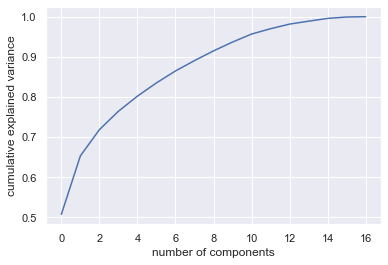

In [27]:
# I have done the split and stratification already above, these values are in X_train, X_test, y_train, y_test~

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA



pca = PCA()
pca.fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

np.cumsum(pca.explained_variance_ratio_)

print('-'*20 + 'Explained Variance ratio' + '-'*20)
print(pca.explained_variance_ratio_)


##### The below code is just loooking at the change in compenents and how it is visualized.

Number of Components: 2 	Scores: [0.76 0.76]
Number of Components: 3 	Scores: [0.77 0.78]
Number of Components: 4 	Scores: [0.79 0.81]
Number of Components: 5 	Scores: [0.81 0.79]
Number of Components: 6 	Scores: [0.81 0.8 ]
Number of Components: 7 	Scores: [0.82 0.8 ]
Number of Components: 8 	Scores: [0.85 0.82]
Number of Components: 10 	Scores: [0.86 0.82]
Number of Components: 11 	Scores: [0.86 0.82]
Number of Components: 12 	Scores: [0.86 0.83]
Number of Components: 13 	Scores: [0.87 0.84]
Number of Components: 14 	Scores: [0.87 0.84]
Number of Components: 15 	Scores: [0.88 0.85]
Number of Components: 16 	Scores: [0.88 0.85]
Number of Components: 17 	Scores: [0.88 0.85]


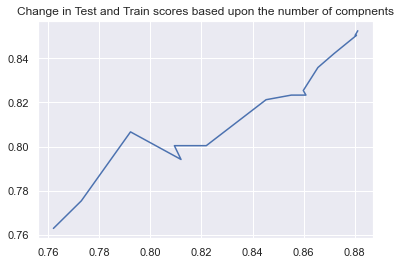

In [28]:
train = []
test = [] 
values = [2,3,4,5,6,7,8,10,11,12,13,14,15,16,17]
for x in values:    
    pca5 = PCA (n_components = x)
    pca5.fit(X_train)

    x2_train = pca5.transform(X_train)

    for train_index, test_index in split.split(x2_train, y_train):
        X_train_ = x2_train[train_index]
        X_val = x2_train[test_index]
        y_train_ = y_train[train_index]
        y_val = y_train[test_index]

    model=SVC().fit(X_train_, y_train_)

    #print("Accuracy on training set: {:.2f}".format(model.score(X_train_, y_train_)))
    #print("Accuracy on test set: {:.2f}".format(model.score(X_val, y_val)))
    train.append(model.score(X_train_, y_train_))
    test.append(model.score(X_val, y_val))

plt.plot(train, test)
plt.title("Change in Test and Train scores based upon the number of compnents")

scores = dict(zip(values,zip(train,test)))
for t in scores:
    print ('Number of Components:', t, "\tScores:", np.round(scores[t], 2))

#### Running the code in order to account for 95% of the dataset produces this curve

--------------------Explained variance ratio--------------------
[0.50713921 0.14570962 0.06547579 0.0458739  0.03764071 0.03313814
 0.02974613 0.02582832 0.02420186 0.02203738 0.01996635]


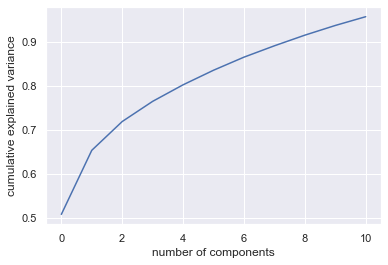

In [29]:
pca2 = PCA(n_components=0.95)
# fit PCA model to data
pca2.fit(X_train)
plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

np.cumsum(pca.explained_variance_ratio_)


print('-'*20 + 'Explained variance ratio' + '-'*20)
print(pca2.explained_variance_ratio_)

#### Now visualizing the outcomes with 8 different components 

Text(0, 0.5, 'Second principal component')

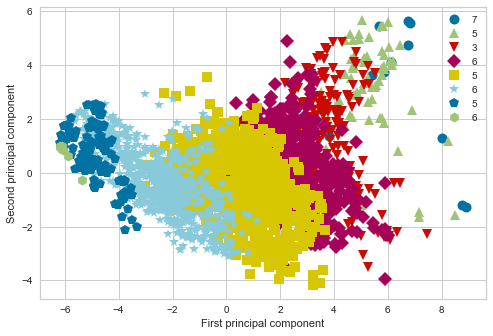

In [143]:
# keep the first two principal components of the data
pca3 = PCA(n_components=0.95)
# fit PCA model to data
pca3.fit(X_train)

# transform data onto the first two principal components
X_pca3 = pca3.transform(X_train)

# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca3[:, 0], X_pca3[:, 1], y_train)
plt.legend(y_train, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

#### now to look at the varaince and such of the data, I choose 8 becasue thats the number of different predictor labels it coudl be

Text(0, 0.5, 'Principal components')

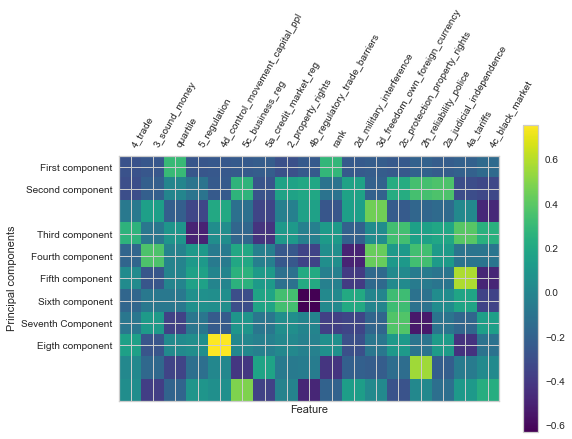

In [144]:
plt.matshow(pca3.components_, cmap='viridis')
plt.yticks([0, 1, 3, 4, 5, 6, 7, 8], ["First component", "Second component", "Third component", "Fourth component", "Fifth component", "Sixth component", "Seventh Component", "Eigth component"])
plt.colorbar()
plt.xticks(range(len(X_train.columns)),
           X_train.columns, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

##### Want to look at the change in score from the data with a value of 2 - 17 compnents. It would seem that you kind of taper off at 16.

#### Looing at the USING SVC but with the PCA that accounts for 0.95 

In [145]:
pca4 = PCA(n_components = 0.95)
# fit PCA model to data
pca4.fit(X_train)
# transform data onto the first two principal components
X_pca4 = pca4.transform(X_train)

for train_index, test_index in split.split(X_pca4, y_train):
    X_train_ = X_pca4[train_index]
    X_val = X_pca4[test_index]
    y_train_ = y_train[train_index]
    y_val = y_train[test_index]

model=SVC()
model.fit(X_train_, y_train_)

print("Accuracy on training set: {:.2f}".format(model.score(X_train_, y_train_)))
print("Accuracy on test set: {:.2f}".format(model.score(X_val, y_val)))

prediction = model.predict(X_val)
training_predictioin = model.predict(X_train_)

print('\nSVM Optimized w/ CV = CV\n')
training_accuracy = np.mean(training_predictioin == y_train_)
test_accuracy = np.mean(prediction == y_val)

print("\nTrain Accuracy: ", training_accuracy)
print("\nTest Accuracy: ", test_accuracy)

test_size = X_val.shape[0]
test_no_correct = test_size  * test_accuracy

print ("\nTest - No. Of Correct Predictions", test_no_correct, "/", test_size)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_val, prediction))


precision_test = precision_score(y_val, prediction,average='weighted') 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_val, prediction,average='weighted')
print("Test Recall = %f" % recall_test)


f1_test = f1_score(y_val, prediction,average='weighted')
print("Test F1 Score = %f" % f1_test)


print("\nClassification Report:")
print(classification_report(y_val, prediction))

Accuracy on training set: 0.86
Accuracy on test set: 0.82

SVM Optimized w/ CV = CV


Train Accuracy:  0.8609375

Test Accuracy:  0.8232848232848233

Test - No. Of Correct Predictions 396.0 / 481

Test Confusion Matrix:
[[  0   2   0   0   0   0   0   0]
 [  0  10   3   0   0   0   0   0]
 [  0   1  22  12   0   0   0   0]
 [  0   0   5  73  11   0   0   0]
 [  0   0   0   9 128  17   0   0]
 [  0   0   0   0   6 148   7   0]
 [  0   0   0   0   0  11  15   0]
 [  0   0   0   0   0   0   1   0]]

Test Precision = 0.817196
Test Recall = 0.823285
Test F1 Score = 0.818880

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.77      0.77      0.77        13
           3       0.73      0.63      0.68        35
           4       0.78      0.82      0.80        89
           5       0.88      0.83      0.86       154
           6       0.84      0.92      0.88       161
           7       0.

C:\Users\scott\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\scott\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###### Produces a worse result than what was previously considered the best. 

# KMean

### KMeans Without PCA

In [95]:
for train_index, test_index in split.split(X_train, y_train):
    X_train_ = X_train.iloc[train_index]
    X_val = X_train.iloc[test_index]
    y_train_ = y_train[train_index]
    y_val = y_train[test_index]
X_train_ = X_train_.to_numpy()
X_val = X_val.to_numpy()
print("X Train Shape", X_train_.shape)
print("X Validationc Shape", X_val.shape)
print("Y Train Shape", y_train_.shape)
print("Y Validation Shape", y_val.shape)

X Train Shape (1920, 17)
X Validationc Shape (481, 17)
Y Train Shape (1920,)
Y Validation Shape (481,)


### Identifying the optimal K values

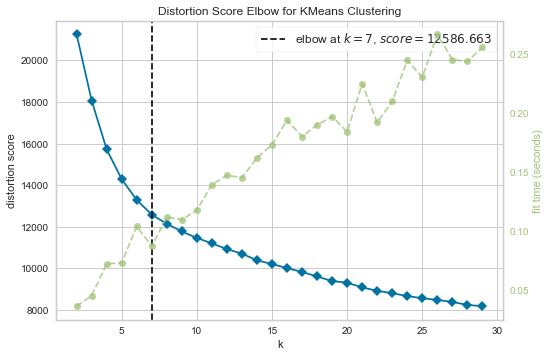

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [96]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(X_train_)        # Fit data to visualizer
visualizer.show() 

Text(0, 0.5, 'Feature 1')

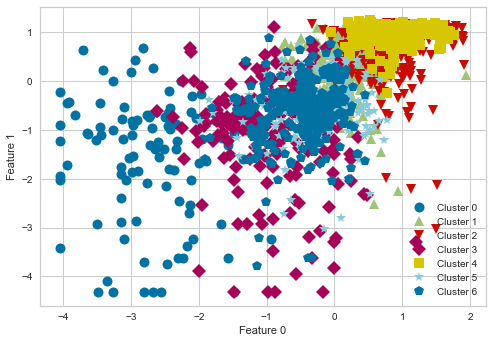

In [97]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 7)
kmeans.fit(X_train_)

assigments = kmeans.labels_
mglearn.discrete_scatter(X_train_[:,0], X_train_[:,1], assigments)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3",
            "Cluster 4","Cluster 5","Cluster 6","Cluster 7",])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### Looking at the Score from Validation set without PCA

In [98]:
from sklearn.metrics import silhouette_samples, silhouette_score, adjusted_rand_score

n_clusters_ = 7
model_prediction = KMeans(n_clusters = n_clusters_)
cluster_labels = model_prediction.fit_predict(X_train)
silhouette_avg = silhouette_score(X_train, cluster_labels)
print("For n_clusters =", n_clusters_,
      "The average silhouette_score is :", silhouette_avg)
print("ARI for n_clusters", adjusted_rand_score(y_train, cluster_labels))

For n_clusters = 7 The average silhouette_score is : 0.1809891713874838
ARI for n_clusters 0.28401158659443754


### With PCA 

In [99]:
for train_index, test_index in split.split(X_pca4, y_train):
    X_train_ = X_pca4[train_index]
    X_val = X_pca4[test_index]
    y_train_ = y_train[train_index]
    y_val = y_train[test_index]
# print("X Train Shape", X_train_.shape)
# print("X Validationc Shape", X_val.shape)
# print("Y Train Shape", y_train_.shape)
# print("Y Validation Shape", y_val.shape)

X Train Shape (1920, 11)
X Validationc Shape (481, 11)
Y Train Shape (1920,)
Y Validation Shape (481,)


### Identifying the optimal K values

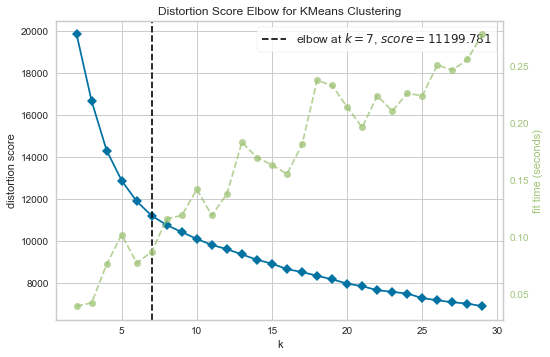

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [100]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(X_train_)        # Fit data to visualizer
visualizer.show() 

Text(0, 0.5, 'Feature 1')

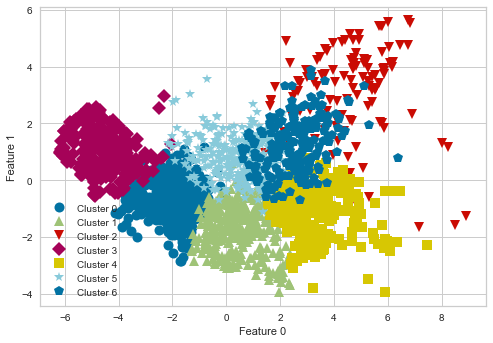

In [101]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 7)
kmeans.fit(X_train_)

assigments = kmeans.labels_
mglearn.discrete_scatter(X_train_[:,0], X_train_[:,1], assigments)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3",
            "Cluster 4","Cluster 5","Cluster 6","Cluster 7",])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

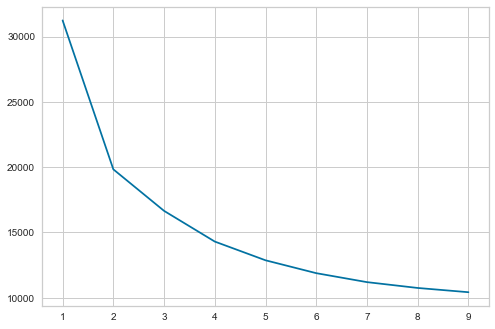

In [92]:
inertiavalus = {}
for k in range(1,10):
    kmeansT = KMeans(n_clusters = k, max_iter = 1000).fit(X_train_)
    inertiavalus[k] = kmeansT.inertia_
plt.figure()
plt.plot(list(inertiavalus.keys()), list(inertiavalus.values()))

### Looking at the Score from Validation set with PCA

In [102]:
from sklearn.metrics import silhouette_samples, silhouette_score, adjusted_rand_score

n_clusters_ = 7
model_prediction = KMeans(n_clusters = n_clusters_)
model_prediction.fit(X_train_)
cluster_labels = model_prediction.predict(X_val)
silhouette_avg = silhouette_score(X_val, cluster_labels)
print("For n_clusters =", n_clusters_,
      "The average silhouette_score is :", silhouette_avg)
print("ARI for n_clusters", adjusted_rand_score(y_val, cluster_labels))

For n_clusters = 7 The average silhouette_score is : 0.19371777149445293
ARI for n_clusters 0.30416641064596966


## Agglormerative Clustering 

### Without PCA

In [110]:
for train_index, test_index in split.split(X_train, y_train):
    X_train_ = X_train.iloc[train_index]
    X_val = X_train.iloc[test_index]
    y_train_ = y_train[train_index]
    y_val = y_train[test_index]
X_train_ = X_train_.to_numpy()
X_val = X_val.to_numpy()
print("X Train Shape", X_train_.shape)
print("X Validationc Shape", X_val.shape)
print("Y Train Shape", y_train_.shape)
print("Y Validation Shape", y_val.shape)

X Train Shape (1920, 17)
X Validationc Shape (481, 17)
Y Train Shape (1920,)
Y Validation Shape (481,)


For n_clusters = 7 The average silhouette_score is : 0.1517670724374333
ARI for n_clusters 0.3106029711131833


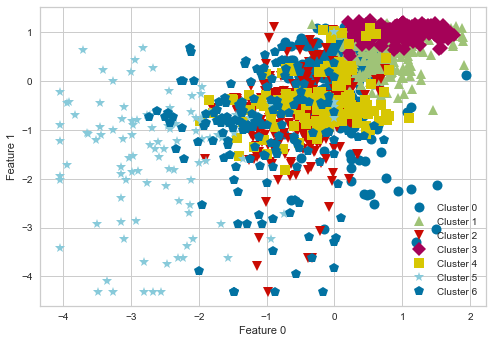

In [109]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=7)
assignment = agg.fit_predict(X_train_)

mglearn.discrete_scatter(X_train_[:, 0], X_train_[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3",
            "Cluster 4","Cluster 5","Cluster 6","Cluster 7", "Cluster 8", "Cluster 9"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

silhouette_avg = silhouette_score(X_train_, assignment)
print("For n_clusters =", n_clusters_,
      "The average silhouette_score is :", silhouette_avg)
print("ARI for n_clusters", adjusted_rand_score(y_train_, assignment))

### With PCA Clustering

In [146]:
for train_index, test_index in split.split(X_pca4, y_train):
    X_train_ = X_pca4[train_index]
    X_val = X_pca4[test_index]
    y_train_ = y_train[train_index]
    y_val = y_train[test_index]


For n_clusters = 7 The average silhouette_score is : 0.1629743229959804
ARI for n_clusters 0.2643064223180707


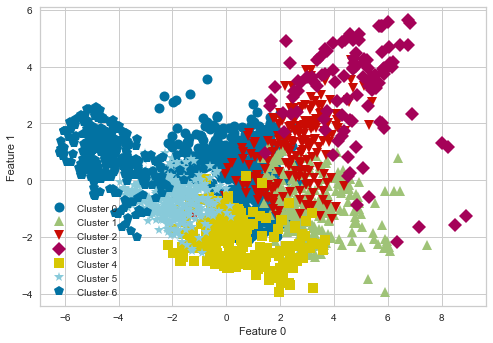

In [147]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=7)
assignment = agg.fit_predict(X_train_)

mglearn.discrete_scatter(X_train_[:, 0], X_train_[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3",
            "Cluster 4","Cluster 5","Cluster 6","Cluster 7", "Cluster 8", "Cluster 9"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

silhouette_avg = silhouette_score(X_train_, assignment)
print("For n_clusters =", n_clusters_,
      "The average silhouette_score is :", silhouette_avg)
print("ARI for n_clusters", adjusted_rand_score(y_train_, assignment))

## Hierarchy Clustering

#### I did try running it with Hiearchy Clustering but it didn't really produce any results. I kept it in the submission just to keep there, so I can still reference it for the Final Paper. 

### Without PCA

In [113]:
for train_index, test_index in split.split(X_train, y_train):
    X_train_ = X_train.iloc[train_index]
    X_val = X_train.iloc[test_index]
    y_train_ = y_train[train_index]
    y_val = y_train[test_index]
X_train_ = X_train_.to_numpy()
X_val = X_val.to_numpy()
print("X Train Shape", X_train_.shape)
print("X Validationc Shape", X_val.shape)
print("Y Train Shape", y_train_.shape)
print("Y Validation Shape", y_val.shape)

X Train Shape (1920, 17)
X Validationc Shape (481, 17)
Y Train Shape (1920,)
Y Validation Shape (481,)


Text(0, 0.5, 'Cluster distance')

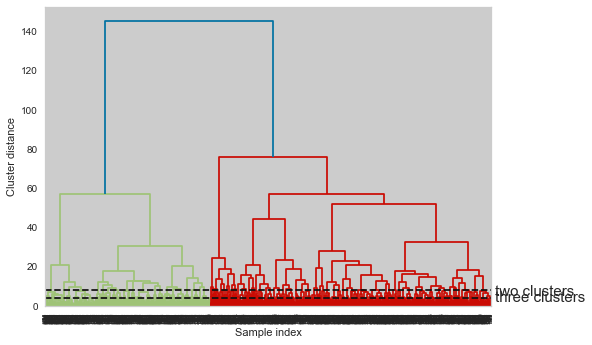

In [114]:
from scipy.cluster.hierarchy import dendrogram, ward

# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(X_train_)
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

# mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [8, 8], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4.3, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

### Without PCA

In [115]:
for train_index, test_index in split.split(X_pca4, y_train):
    X_train_ = X_pca4[train_index]
    X_val = X_pca4[test_index]
    y_train_ = y_train[train_index]
    y_val = y_train[test_index]

Text(0, 0.5, 'Cluster distance')

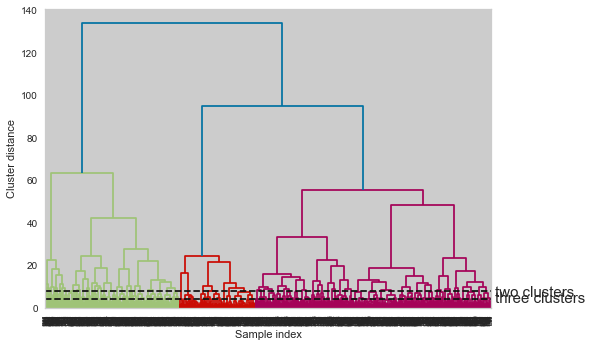

In [116]:
from scipy.cluster.hierarchy import dendrogram, ward

# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(X_train_)
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

# mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [8, 8], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4.3, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

# DBSCAN

### Without PCA

In [120]:
for train_index, test_index in split.split(X_train, y_train):
    X_train_ = X_train.iloc[train_index]
    X_val = X_train.iloc[test_index]
    y_train_ = y_train[train_index]
    y_val = y_train[test_index]
X_train_ = X_train_.to_numpy()
X_val = X_val.to_numpy()
# print("X Train Shape", X_train_.shape)
# print("X Validationc Shape", X_val.shape)
# print("Y Train Shape", y_train_.shape)
# print("Y Validation Shape", y_val.shape)

X Train Shape (1920, 17)
X Validationc Shape (481, 17)
Y Train Shape (1920,)
Y Validation Shape (481,)


For n_clusters = 7 
The average silhouette_score is : 0.22564839429983008
ARI for n_clusters 0.008464337104955755


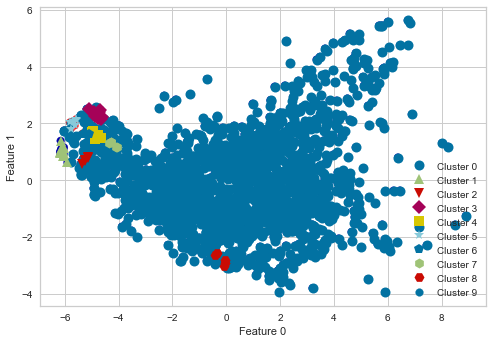

In [141]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(min_samples=5,eps=0.5)
clusters = dbscan.fit_predict(X_train_)

#plot the cluster assignments
plt.scatter(X_train_[:, 0], X_train_[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

mglearn.discrete_scatter(X_train_[:, 0], X_train_[:, 1], clusters)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3",
            "Cluster 4","Cluster 5","Cluster 6","Cluster 7", "Cluster 8", "Cluster 9"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

silhouette_avg = np.abs(silhouette_score(X_train_, clusters))
print("For n_clusters =", n_clusters_,
      "\nThe average silhouette_score is :", silhouette_avg)
print("ARI for n_clusters", adjusted_rand_score(y_train_, clusters))

### With PCA

In [183]:
for train_index, test_index in split.split(X_pca4, y_train):
    X_train_ = X_pca4[train_index]
    X_val = X_pca4[test_index]
    y_train_ = y_train[train_index]
    y_val = y_train[test_index]

For n_clusters = 7 The average silhouette_score is : 0.3137409184613768
ARI for n_clusters 0.06979539945094712


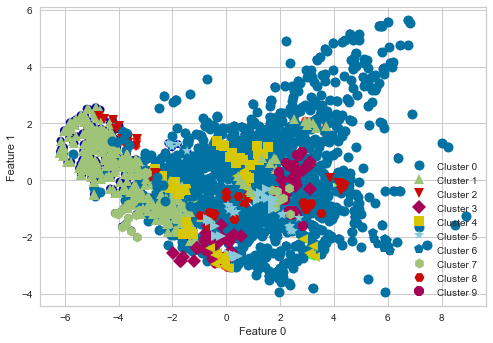

In [209]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(min_samples=5,eps=0.99)
clusters = dbscan.fit_predict(X_train_)

#plot the cluster assignments
plt.scatter(X_train_[:, 0], X_train_[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

mglearn.discrete_scatter(X_train_[:, 0], X_train_[:, 1], clusters)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3",
            "Cluster 4","Cluster 5","Cluster 6","Cluster 7", "Cluster 8", "Cluster 9"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

silhouette_avg = np.abs(silhouette_score(X_train_, clusters))
print("For n_clusters =", n_clusters_,
      "The average silhouette_score is :", silhouette_avg)
print("ARI for n_clusters", adjusted_rand_score(y_train_, clusters))

In [ ]:
# samples_ = [1,2,3,4,6,7,8,9]
eps_ = np.arange(0.5, 1, 0.01)
ARI = []
Sil_score = []
Params = []
for x in samples_:
    tracker = 0
    print(tracker)
    for y in eps_:
        dbscan = DBSCAN(min_samples=x,eps=y)
        clusters = dbscan.fit_predict(X_train_)
        silhouette_avg = np.abs(silhouette_score(X_train_, clusters))
        Sil_score.append(silhouette_avg)
        ARI.append(adjusted_rand_score(y_train_, clusters))
        Params.append((x,y))
    tracker += 1
outputs = dict(zip(Params, zip(ARI, Sil_score)))

### It did show that 1 samples and 0.99 eps had the best ARI score, but I ddin't use this becasue the actual visualization didn't work as well as it produced different values up to 819 of possible clusters 

### With Ground truth

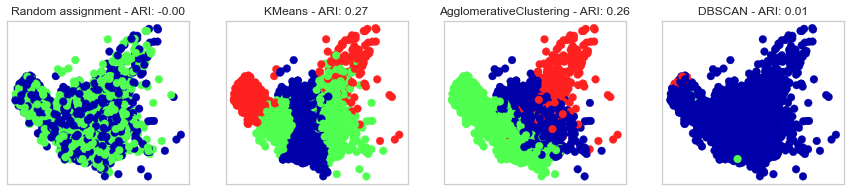

In [167]:
fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# make a list of algorithms to use
algorithms = [KMeans(n_clusters=7), AgglomerativeClustering(n_clusters=7),
              DBSCAN()]

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X_train_))

# plot random assignment
axes[0].scatter(X_train_[:, 0], X_train_[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
        adjusted_rand_score(y_train_, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_train_)
    ax.scatter(X_train_[:, 0], X_train_[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y_train_, clusters)))

### Without Ground truth

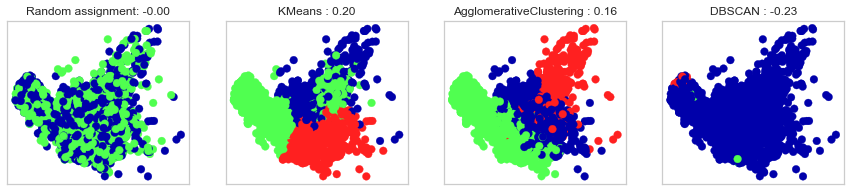

In [168]:
# rescale the data to zero mean and unit variance
fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X_train_))

# plot random assignment
axes[0].scatter(X_train_[:, 0], X_train_[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(
    silhouette_score(X_train_, random_clusters)))

algorithms = [KMeans(n_clusters=7), AgglomerativeClustering(n_clusters=7),
              DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_train_)
    # plot the cluster assignments and cluster centers
    ax.scatter(X_train_[:, 0], X_train_[:, 1], c=clusters, cmap=mglearn.cm3,
               s=60)
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                                      silhouette_score(X_train_, clusters)))